In [ ]:
#In the name of GOD

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=7eaf27a880abdc3d8936c56aec83bcbb41812951d0c3ba477257f3e4b6c6ad86
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import numpy as np
import pandas as pd
from apyori import apriori

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Groceries_dataset.csv to Groceries_dataset.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Groceries_dataset.csv']))

In [ ]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
transactions = data.groupby(['Member_number', 'Date'])
transactions.count().reset_index

<bound method DataFrame.reset_index of                           itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
...                                   ...
4999          24-01-2015                6
              26-12-2015                2
5000          09-03-2014                2
              10-02-2015                3
              16-11-2014                2

[14963 rows x 1 columns]>

In [ ]:
#calculating support of each item
support_count  = data['itemDescription'].value_counts()
support_count

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [ ]:
relative_support = (support_count/14963)*100
relative_support

whole milk               16.721246
other vegetables         12.684622
rolls/buns               11.468288
soda                     10.118292
yogurt                    8.915324
                           ...    
rubbing alcohol           0.033416
bags                      0.026733
baby cosmetics            0.020049
kitchen utensil           0.006683
preservation products     0.006683
Name: itemDescription, Length: 167, dtype: float64

In [ ]:
relative_support.describe()

count    167.000000
mean       1.551332
std        2.428939
min        0.006683
25%        0.203836
50%        0.568068
75%        1.764352
max       16.721246
Name: itemDescription, dtype: float64

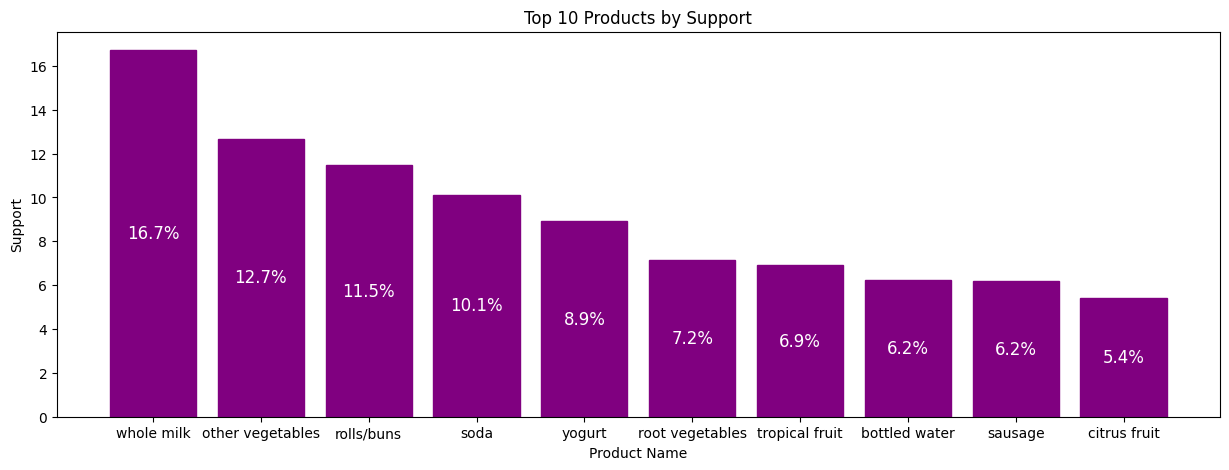

In [ ]:
#Top 10 products by support

import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(len(relative_support.head(10))), height = (relative_support).head(10))
plt.bar_label(bars, fontsize=12, color='white', fmt = '%2.1f%%', label_type = 'center')
plt.xticks(ticks = np.arange(len(relative_support.head(10))), labels = relative_support.index[:10])
for i in range(0,10):
  bars[i].set_color('purple')


plt.title('Top 10 Products by Support')
plt.ylabel('Support')
plt.xlabel('Product Name')
plt.show()

In [ ]:
#separate year , month and day in date column
data_1 = data
data_1['date'] = pd.to_datetime(data['Date'])
data_1['year'] = data_1['date'].dt.year
data_1['month'] = data_1['date'].dt.month
data_1['day'] = data_1['date'].dt.day
data_1 = data_1.drop('date',axis=1)

data_1.head()

<ipython-input-13-e0f935c6d005>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_1['date'] = pd.to_datetime(data['Date'])


,Member_number,Date,itemDescription,year,month,day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


In [ ]:
t_1 = data_1.groupby(['month'])
t_1['itemDescription'].count().reset_index

<bound method Series.reset_index of month
1     3333
2     3032
3     3283
4     3172
5     3335
6     3316
7     3268
8     3498
9     2963
10    3218
11    3273
12    3074
Name: itemDescription, dtype: int64>

In [ ]:
l = t_1['itemDescription'].count().to_list()

Text(0.5, 1.0, 'Number of purchases in different months')

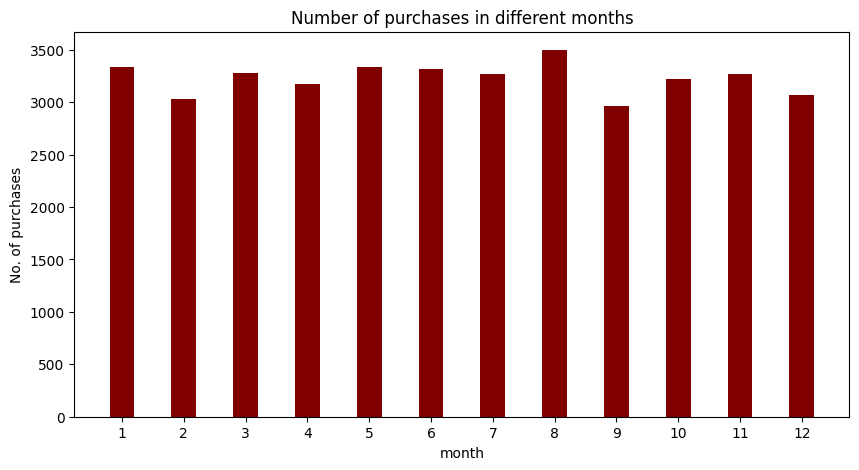

In [ ]:
fig = plt.figure(figsize = (10, 5))
m = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.bar(m, l, color ='maroon',
        width = 0.4)
plt.xticks(ticks = m)
plt.xlabel("month")
plt.ylabel("No. of purchases")
plt.title("Number of purchases in different months")

#Apriori Algorithm

In [ ]:
transactions_list = []
transactions_list = [i[1]['itemDescription'].tolist() for i in list(transactions)]
transactions_list


[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [ ]:
from apyori import apriori
association_rules = apriori(transactions = transactions_list , min_support=0.001, min_confidence=0.05, min_lift=1.2)
results = list(association_rules)
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[RelationRecord(items=frozenset({'beverages', 'sausage'}), support=0.0015371249081066632, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beverages'}), items_add=frozenset({'sausage'}), confidence=0.09274193548387098, lift=1.5367636551995143)]),
 RelationRecord(items=frozenset({'sausage', 'bottled beer'}), support=0.003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled beer'}), items_add=frozenset({'sausage'}), confidence=0.07374631268436578, lift=1.2220000849348451), OrderedStatistic(items_base=frozenset({'sausage'}), items_add=frozenset({'bottled beer'}), confidence=0.05537098560354374, lift=1.2220000849348451)]),
 RelationRecord(items=frozenset({'bottled water', 'sugar'}), support=0.0014702933903628951, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sugar'}), items_add=frozenset({'bottled water'}), confidence=0.0830188679245283, lift=1.368074141800349)]),
 RelationRecord(items=frozenset({'brown bread', 'canned beer'}), suppo

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
rules_df = pd.DataFrame(columns = ['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])
for i in results:
    if len(i[0]) > 1:
        for j in range(0, len(i[2])):
            LHS = list(i[2][j][0])[0]
            RHS = list(i[2][j][1])[0]
            SUPPORT = i[1]*100
            CONFIDENCE = i[2][j][2]*100
            LIFT = i[2][j][3]
            new_row = {'Left Hand Side': LHS, 'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
            rules_df = rules_df.append(new_row, ignore_index = True)
rules_df['Rule'] = rules_df['Left Hand Side'] + ' -> ' + rules_df['Right Hand Side']
apriori_rules = rules_df
apriori_rules.head()

<ipython-input-19-50c98384b7eb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rules_df = rules_df.append(new_row, ignore_index = True)
<ipython-input-19-50c98384b7eb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rules_df = rules_df.append(new_row, ignore_index = True)
<ipython-input-19-50c98384b7eb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rules_df = rules_df.append(new_row, ignore_index = True)
<ipython-input-19-50c98384b7eb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rules_df = rules_df.append(new_row, ignore_index = True)
<ipython-input-19-50c98384b7eb>:12: FutureWarning: The frame.append method is deprecated

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rule
0,beverages,sausage,0.15,9.27,1.54,beverages -> sausage
1,bottled beer,sausage,0.33,7.37,1.22,bottled beer -> sausage
2,sausage,bottled beer,0.33,5.54,1.22,sausage -> bottled beer
3,sugar,bottled water,0.15,8.30,1.37,sugar -> bottled water
4,brown bread,canned beer,0.24,6.39,1.36,brown bread -> canned beer


In [ ]:
apriori_rules.sort_values("Confidence(%)",ascending=False)

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rule
35,sausage,whole milk,0.15,25.58,1.62,sausage -> whole milk
30,sausage,whole milk,0.11,21.25,1.35,sausage -> whole milk
34,sausage,yogurt,0.15,16.42,1.91,sausage -> yogurt
23,processed cheese,rolls/buns,0.15,14.47,1.32,processed cheese -> rolls/buns
22,packaged fruit/vegetables,rolls/buns,0.12,14.17,1.29,packaged fruit/vegetables -> rolls/buns
25,seasonal products,rolls/buns,0.10,14.15,1.29,seasonal products -> rolls/buns
36,whole milk,sausage,0.15,13.17,2.18,whole milk -> sausage
28,soft cheese,yogurt,0.13,12.67,1.47,soft cheese -> yogurt
12,detergent,yogurt,0.11,12.40,1.44,detergent -> yogurt
20,oil,soda,0.18,12.11,1.25,oil -> soda


In [ ]:
apriori_rules.sort_values("Support(%)",ascending=False)

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rule
2,sausage,bottled beer,0.33,5.54,1.22,sausage -> bottled beer
1,bottled beer,sausage,0.33,7.37,1.22,bottled beer -> sausage
11,curd,sausage,0.29,8.73,1.45,curd -> sausage
4,brown bread,canned beer,0.24,6.39,1.36,brown bread -> canned beer
5,canned beer,brown bread,0.24,5.13,1.36,canned beer -> brown bread
15,frozen vegetables,sausage,0.21,7.40,1.23,frozen vegetables -> sausage
20,oil,soda,0.18,12.11,1.25,oil -> soda
19,napkins,pastry,0.17,7.85,1.52,napkins -> pastry
0,beverages,sausage,0.15,9.27,1.54,beverages -> sausage
7,white bread,canned beer,0.15,6.41,1.37,white bread -> canned beer


In [ ]:
apriori_rules.sort_values("Lift",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rule
36,whole milk,sausage,0.15,13.17,2.18,whole milk -> sausage
34,sausage,yogurt,0.15,16.42,1.91,sausage -> yogurt
10,specialty chocolate,citrus fruit,0.14,8.79,1.65,specialty chocolate -> citrus fruit
35,sausage,whole milk,0.15,25.58,1.62,sausage -> whole milk
13,flour,tropical fruit,0.11,10.96,1.62,flour -> tropical fruit
0,beverages,sausage,0.15,9.27,1.54,beverages -> sausage
33,soda,sausage,0.11,9.20,1.52,soda -> sausage
19,napkins,pastry,0.17,7.85,1.52,napkins -> pastry
24,processed cheese,root vegetables,0.11,10.53,1.51,processed cheese -> root vegetables
17,hard cheese,pip fruit,0.11,7.27,1.48,hard cheese -> pip fruit


In [ ]:
g2_apriori_rules = filter(lambda x: len(x.items) > 2, apriori_rules)

In [ ]:
print('Number of Rules: ', rules_df['Rule'].count(), 'Rules')

Number of Rules:  37 Rules


#Visualization

Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

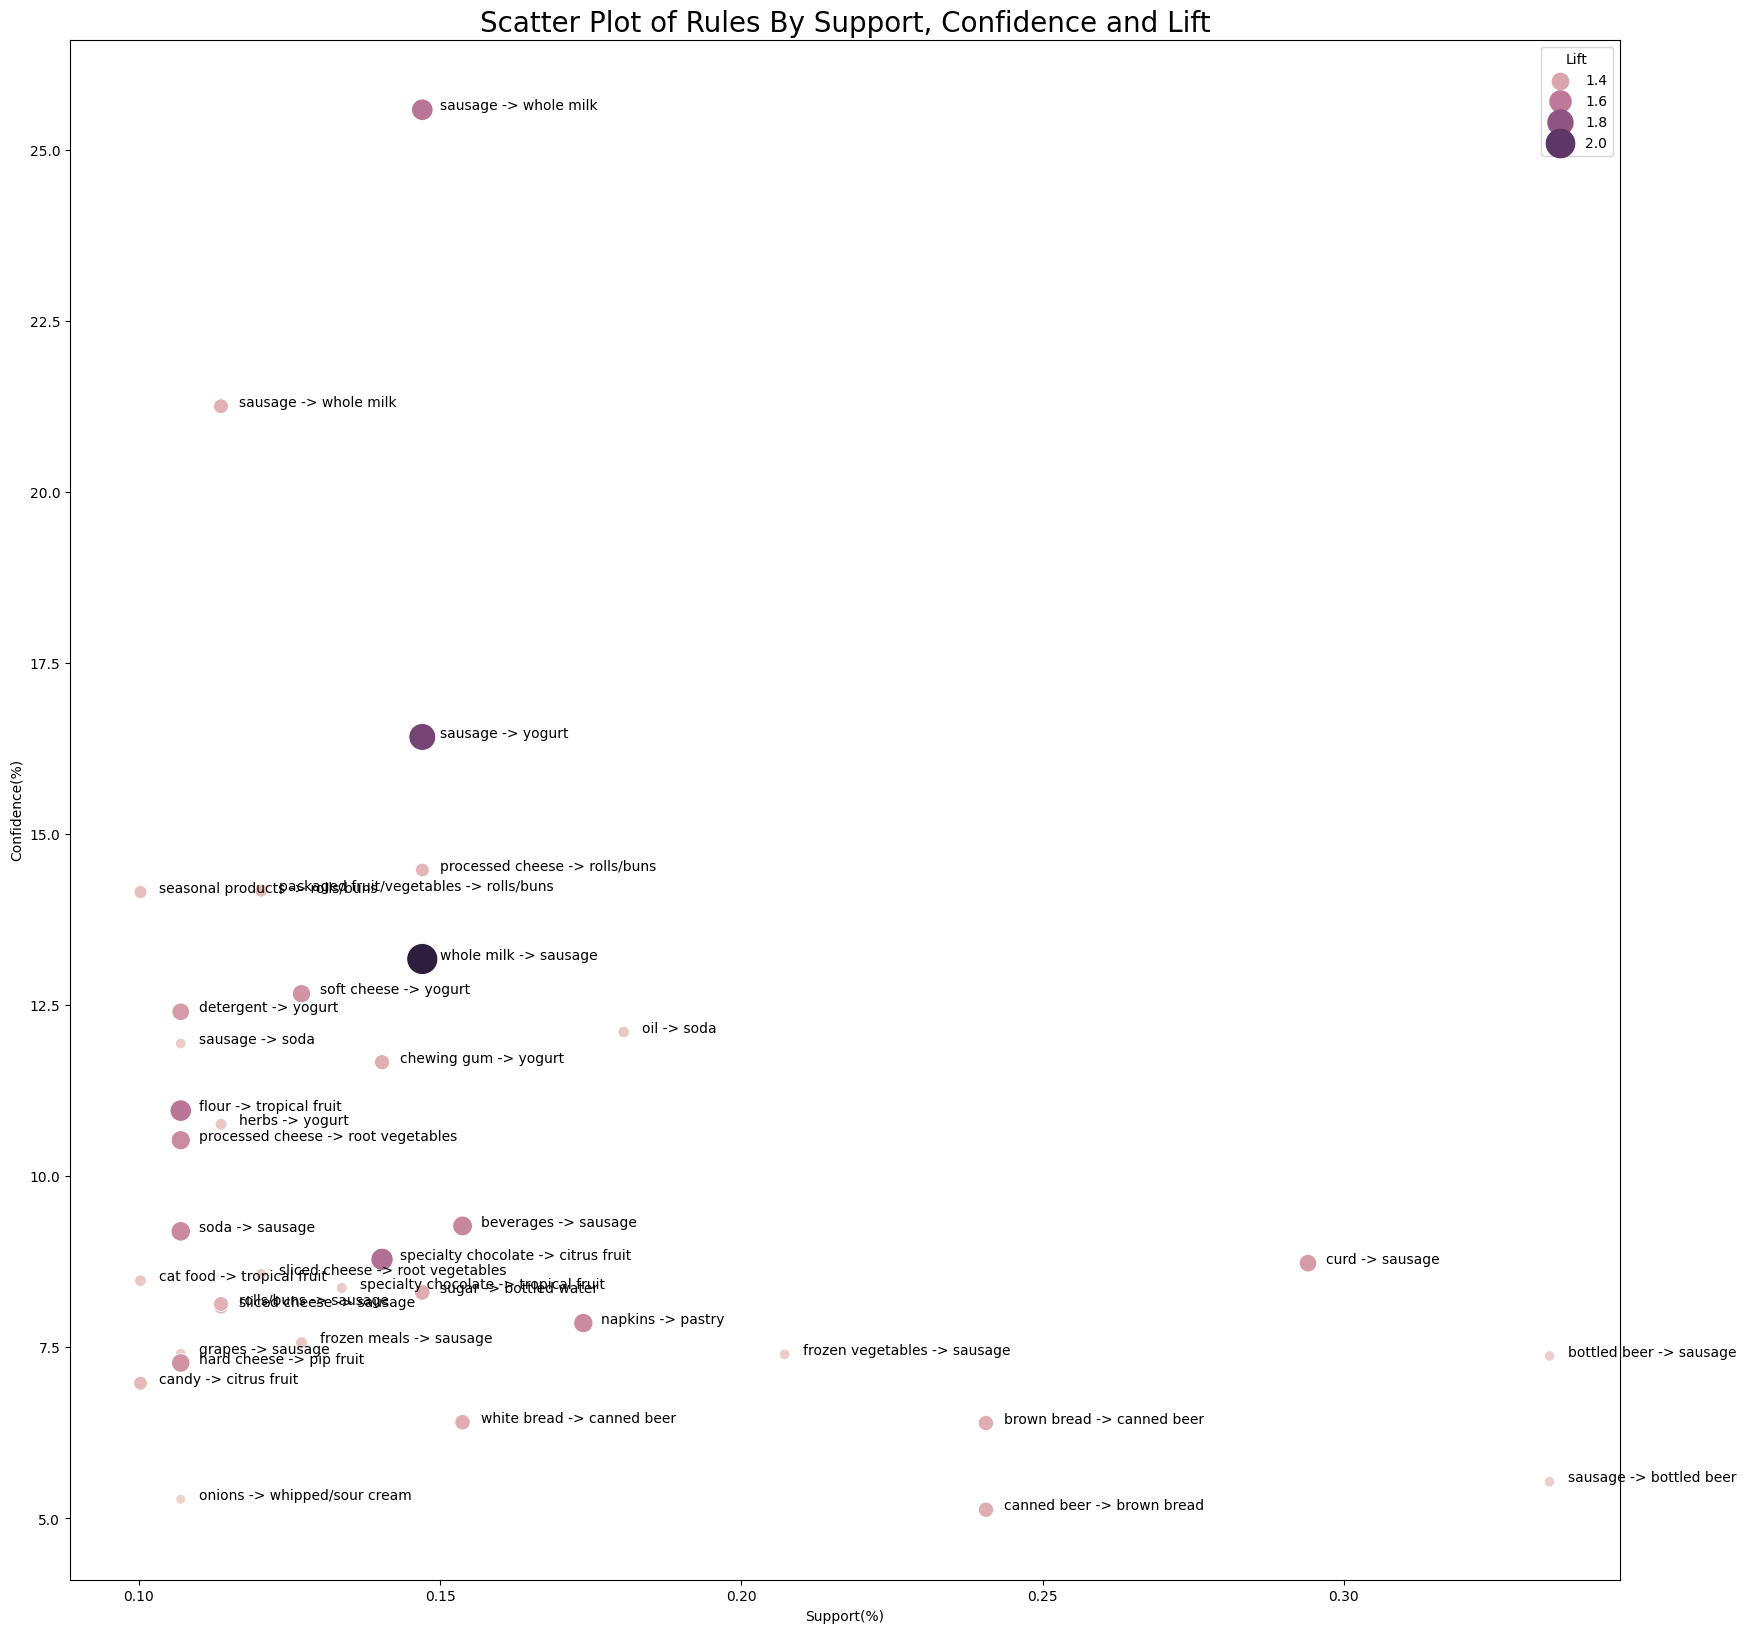

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (20,20))
support = apriori_rules['Support(%)']
confidence = apriori_rules['Confidence(%)']
rule = apriori_rules['Rule']
ax = sns.scatterplot(data = apriori_rules, x = 'Support(%)', y = 'Confidence(%)', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.003, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)

In [ ]:
apriori_rules.sort_values("Lift",ascending=False).head(5)

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rule
36,whole milk,sausage,0.15,13.17,2.18,whole milk -> sausage
34,sausage,yogurt,0.15,16.42,1.91,sausage -> yogurt
10,specialty chocolate,citrus fruit,0.14,8.79,1.65,specialty chocolate -> citrus fruit
35,sausage,whole milk,0.15,25.58,1.62,sausage -> whole milk
13,flour,tropical fruit,0.11,10.96,1.62,flour -> tropical fruit


In [ ]:
apriori_rules.sort_values("Support(%)",ascending=False).head(5)

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rule
2,sausage,bottled beer,0.33,5.54,1.22,sausage -> bottled beer
1,bottled beer,sausage,0.33,7.37,1.22,bottled beer -> sausage
11,curd,sausage,0.29,8.73,1.45,curd -> sausage
4,brown bread,canned beer,0.24,6.39,1.36,brown bread -> canned beer
5,canned beer,brown bread,0.24,5.13,1.36,canned beer -> brown bread


In [ ]:
apriori_rules.sort_values("Confidence(%)",ascending=False).head(5)

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rule
35,sausage,whole milk,0.15,25.58,1.62,sausage -> whole milk
30,sausage,whole milk,0.11,21.25,1.35,sausage -> whole milk
34,sausage,yogurt,0.15,16.42,1.91,sausage -> yogurt
23,processed cheese,rolls/buns,0.15,14.47,1.32,processed cheese -> rolls/buns
22,packaged fruit/vegetables,rolls/buns,0.12,14.17,1.29,packaged fruit/vegetables -> rolls/buns


In [ ]:
#Sampling
sample = data.sample(frac =.5)
print(sample.head())
# sample size
print(f'The sample have {sample.shape[0]} rows and {sample.shape[1]} columns')

transactions = sample.groupby(['Member_number', 'Date'])
transactions.count().reset_index

transactions_list = []
transactions_list = [i[1]['itemDescription'].tolist() for i in list(transactions)]

association_rules = apriori(transactions = transactions_list , min_support=0.001, min_confidence=0.05, min_lift=1.2)
results = list(association_rules)

pd.options.display.float_format = '{:,.2f}'.format
rules_df = pd.DataFrame(columns = ['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])
for i in results:
    if len(i[0]) > 1:
        for j in range(0, len(i[2])):
            LHS = list(i[2][j][0])[0]
            RHS = list(i[2][j][1])[0]
            SUPPORT = i[1]*100
            CONFIDENCE = i[2][j][2]*100
            LIFT = i[2][j][3]
            new_row = {'Left Hand Side': LHS, 'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
            rules_df = rules_df.append(new_row, ignore_index = True)
rules_df['Rule'] = rules_df['Left Hand Side'] + ' -> ' + rules_df['Right Hand Side']
apriori_rules = rules_df
apriori_rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       Member_number        Date itemDescription       date  year  month  day
23144           2143  12-02-2015          onions 2015-12-02  2015     12    2
1355            2575  13-03-2015      pot plants 2015-03-13  2015      3   13
14466           2081  14-02-2014  hamburger meat 2014-02-14  2014      2   14
28082           2872  06-08-2014      whole milk 2014-06-08  2014      6    8
9505            1868  01-11-2014      whole milk 2014-01-11  2014      1   11
The sample have 19382 rows and 7 columns


<ipython-input-58-029fd845f856>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rules_df = rules_df.append(new_row, ignore_index = True)


,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rule
0,frankfurter,other vegetables,0.26,10.44,1.30,frankfurter -> other vegetables


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

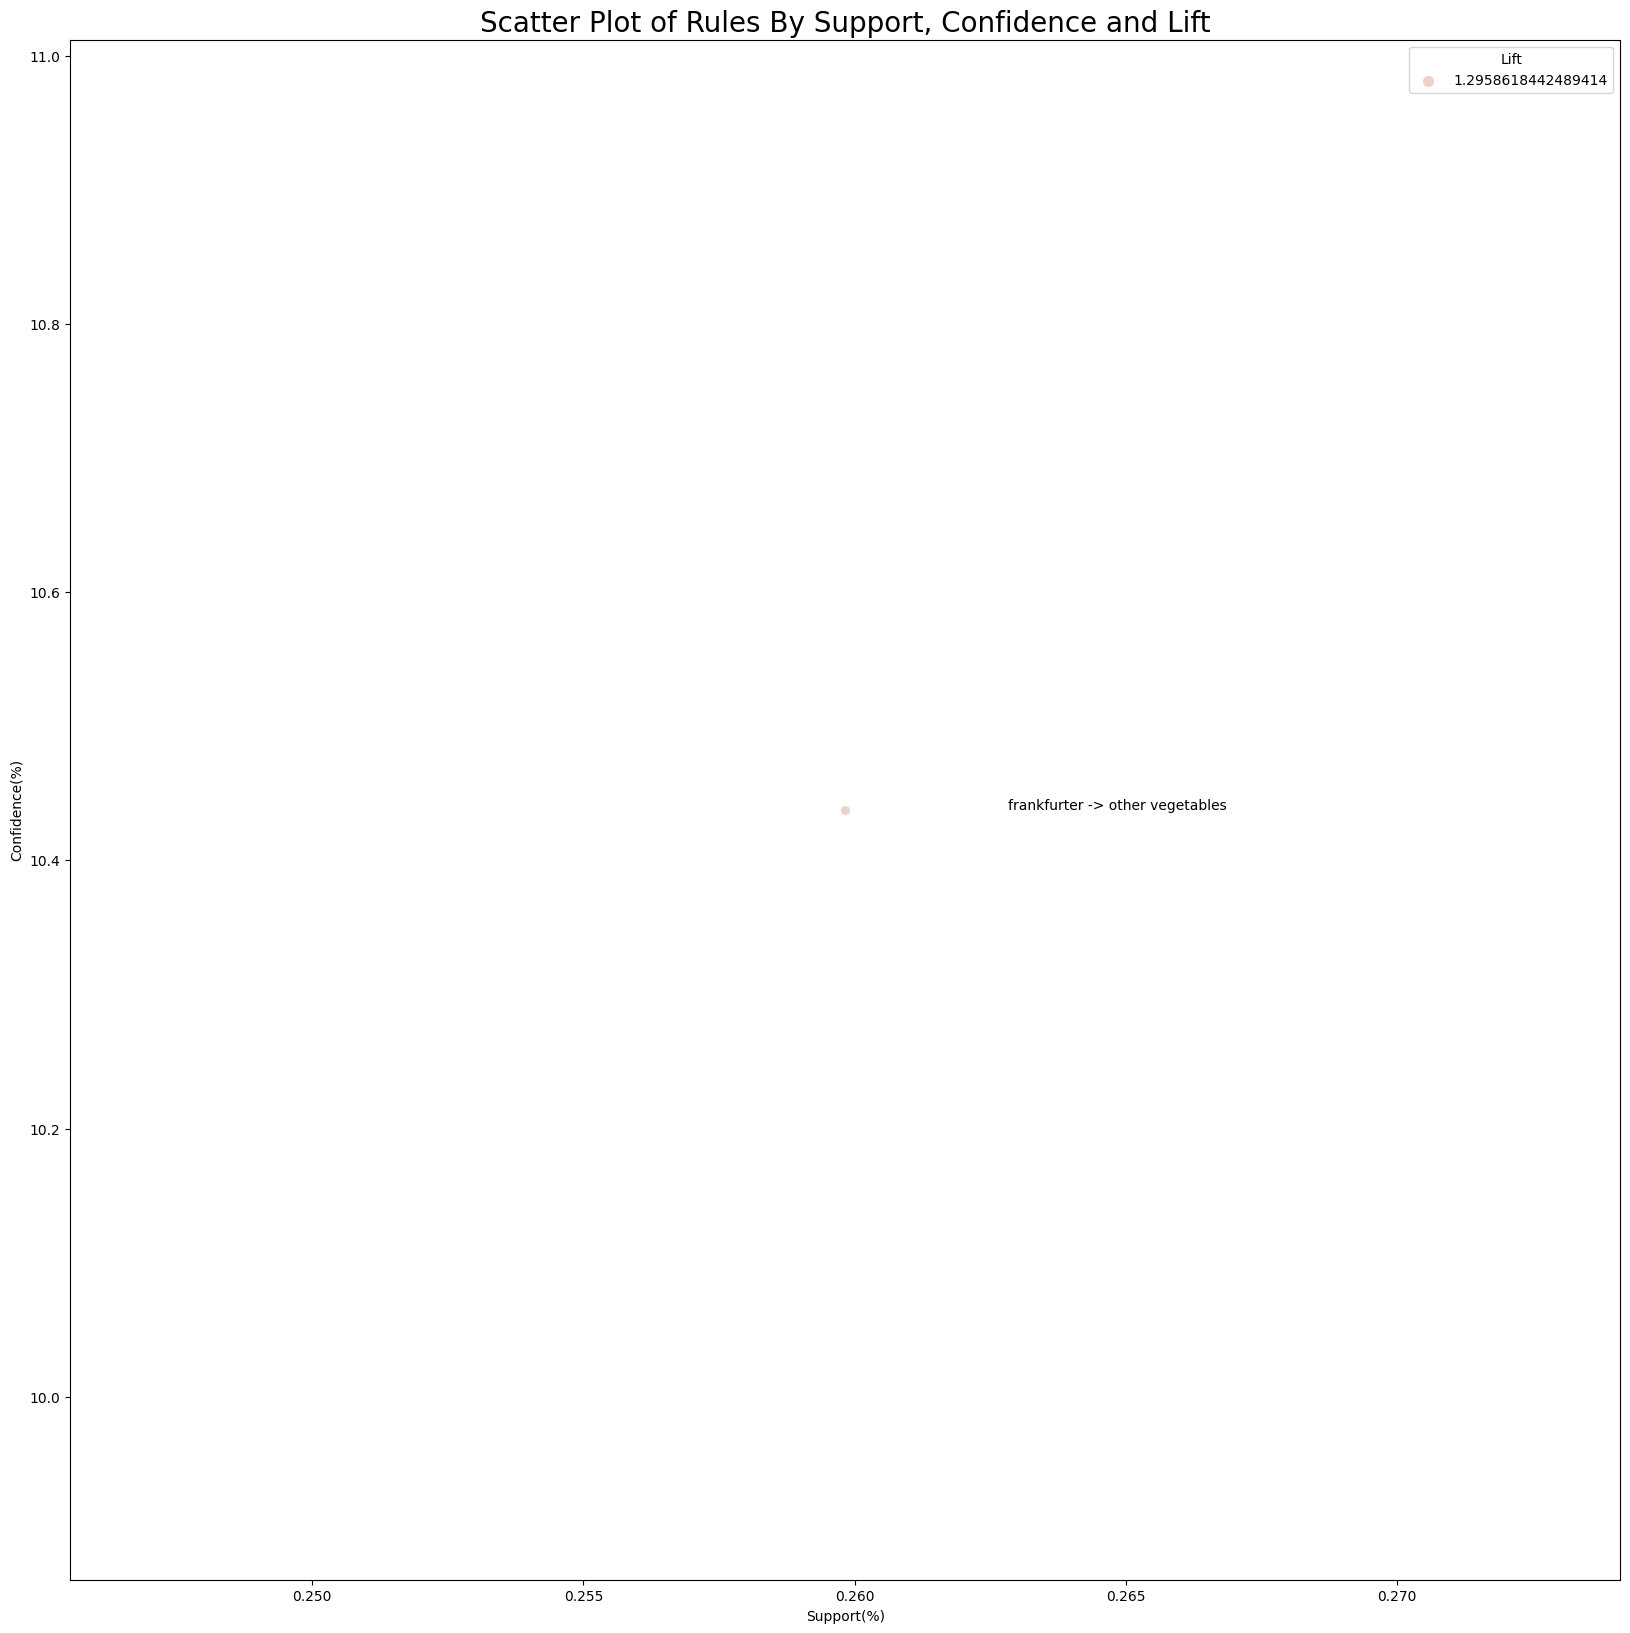

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (20,20))
support = apriori_rules['Support(%)']
confidence = apriori_rules['Confidence(%)']
rule = apriori_rules['Rule']
ax = sns.scatterplot(data = apriori_rules, x = 'Support(%)', y = 'Confidence(%)', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.003, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)

#FP-Growth

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

fp_data = transactions['itemDescription'].apply(list).to_list()
te = TransactionEncoder()
te.fit(fp_data)
enc_transactions = te.transform(fp_data)

fp_transactions = pd.DataFrame(enc_transactions, columns = te.columns_)
fp_transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

frequent_itemsets = fpgrowth(fp_transactions, min_support=0.008, use_colnames = True)
frequent_itemsets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.13,(whole milk)
1,0.07,(yogurt)
2,0.05,(sausage)
3,0.04,(pastry)
4,0.02,(salty snack)
5,0.04,(canned beer)
6,0.01,(misc. beverages)
7,0.01,(hygiene articles)
8,0.08,(soda)
9,0.02,(white bread)


In [ ]:
from mlxtend.frequent_patterns import association_rules

fp_rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold=0.05)
fp_rules["antecedents"] = fp_rules["antecedents"].apply(lambda x: list(x)[0])
fp_rules["consequents"] = fp_rules["consequents"].apply(lambda x: list(x)[0])
fp_rules['Rule'] = fp_rules['antecedents'] + ' -> ' + fp_rules['consequents']
fp_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Rule
0,whole milk,yogurt,0.13,0.07,0.01,0.06,0.85,-0.00,0.99,-0.17,whole milk -> yogurt
1,yogurt,whole milk,0.07,0.13,0.01,0.11,0.85,-0.00,0.98,-0.16,yogurt -> whole milk
2,soda,whole milk,0.08,0.13,0.01,0.10,0.75,-0.00,0.96,-0.27,soda -> whole milk
3,whole milk,soda,0.13,0.08,0.01,0.06,0.75,-0.00,0.98,-0.28,whole milk -> soda
4,rolls/buns,whole milk,0.09,0.13,0.01,0.10,0.74,-0.00,0.96,-0.28,rolls/buns -> whole milk
5,whole milk,rolls/buns,0.13,0.09,0.01,0.07,0.74,-0.00,0.97,-0.28,whole milk -> rolls/buns
6,other vegetables,whole milk,0.10,0.13,0.01,0.10,0.79,-0.00,0.97,-0.23,other vegetables -> whole milk
7,whole milk,other vegetables,0.13,0.10,0.01,0.08,0.79,-0.00,0.98,-0.24,whole milk -> other vegetables


In [ ]:
fp_rules.sort_values("support",ascending=False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Rule
6,other vegetables,whole milk,0.10,0.13,0.01,0.10,0.79,-0.00,0.97,-0.23,other vegetables -> whole milk
7,whole milk,other vegetables,0.13,0.10,0.01,0.08,0.79,-0.00,0.98,-0.24,whole milk -> other vegetables
4,rolls/buns,whole milk,0.09,0.13,0.01,0.10,0.74,-0.00,0.96,-0.28,rolls/buns -> whole milk
5,whole milk,rolls/buns,0.13,0.09,0.01,0.07,0.74,-0.00,0.97,-0.28,whole milk -> rolls/buns
2,soda,whole milk,0.08,0.13,0.01,0.10,0.75,-0.00,0.96,-0.27,soda -> whole milk


In [ ]:
fp_rules.sort_values("confidence",ascending=False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Rule
1,yogurt,whole milk,0.07,0.13,0.01,0.11,0.85,-0.00,0.98,-0.16,yogurt -> whole milk
6,other vegetables,whole milk,0.10,0.13,0.01,0.10,0.79,-0.00,0.97,-0.23,other vegetables -> whole milk
2,soda,whole milk,0.08,0.13,0.01,0.10,0.75,-0.00,0.96,-0.27,soda -> whole milk
4,rolls/buns,whole milk,0.09,0.13,0.01,0.10,0.74,-0.00,0.96,-0.28,rolls/buns -> whole milk
7,whole milk,other vegetables,0.13,0.10,0.01,0.08,0.79,-0.00,0.98,-0.24,whole milk -> other vegetables


In [ ]:
fp_rules.sort_values("lift",ascending=False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Rule
0,whole milk,yogurt,0.13,0.07,0.01,0.06,0.85,-0.00,0.99,-0.17,whole milk -> yogurt
1,yogurt,whole milk,0.07,0.13,0.01,0.11,0.85,-0.00,0.98,-0.16,yogurt -> whole milk
6,other vegetables,whole milk,0.10,0.13,0.01,0.10,0.79,-0.00,0.97,-0.23,other vegetables -> whole milk
7,whole milk,other vegetables,0.13,0.10,0.01,0.08,0.79,-0.00,0.98,-0.24,whole milk -> other vegetables
2,soda,whole milk,0.08,0.13,0.01,0.10,0.75,-0.00,0.96,-0.27,soda -> whole milk


In [ ]:
print('Number of Rules: ', fp_rules['Rule'].count(), 'Rules')

Number of Rules:  20 Rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

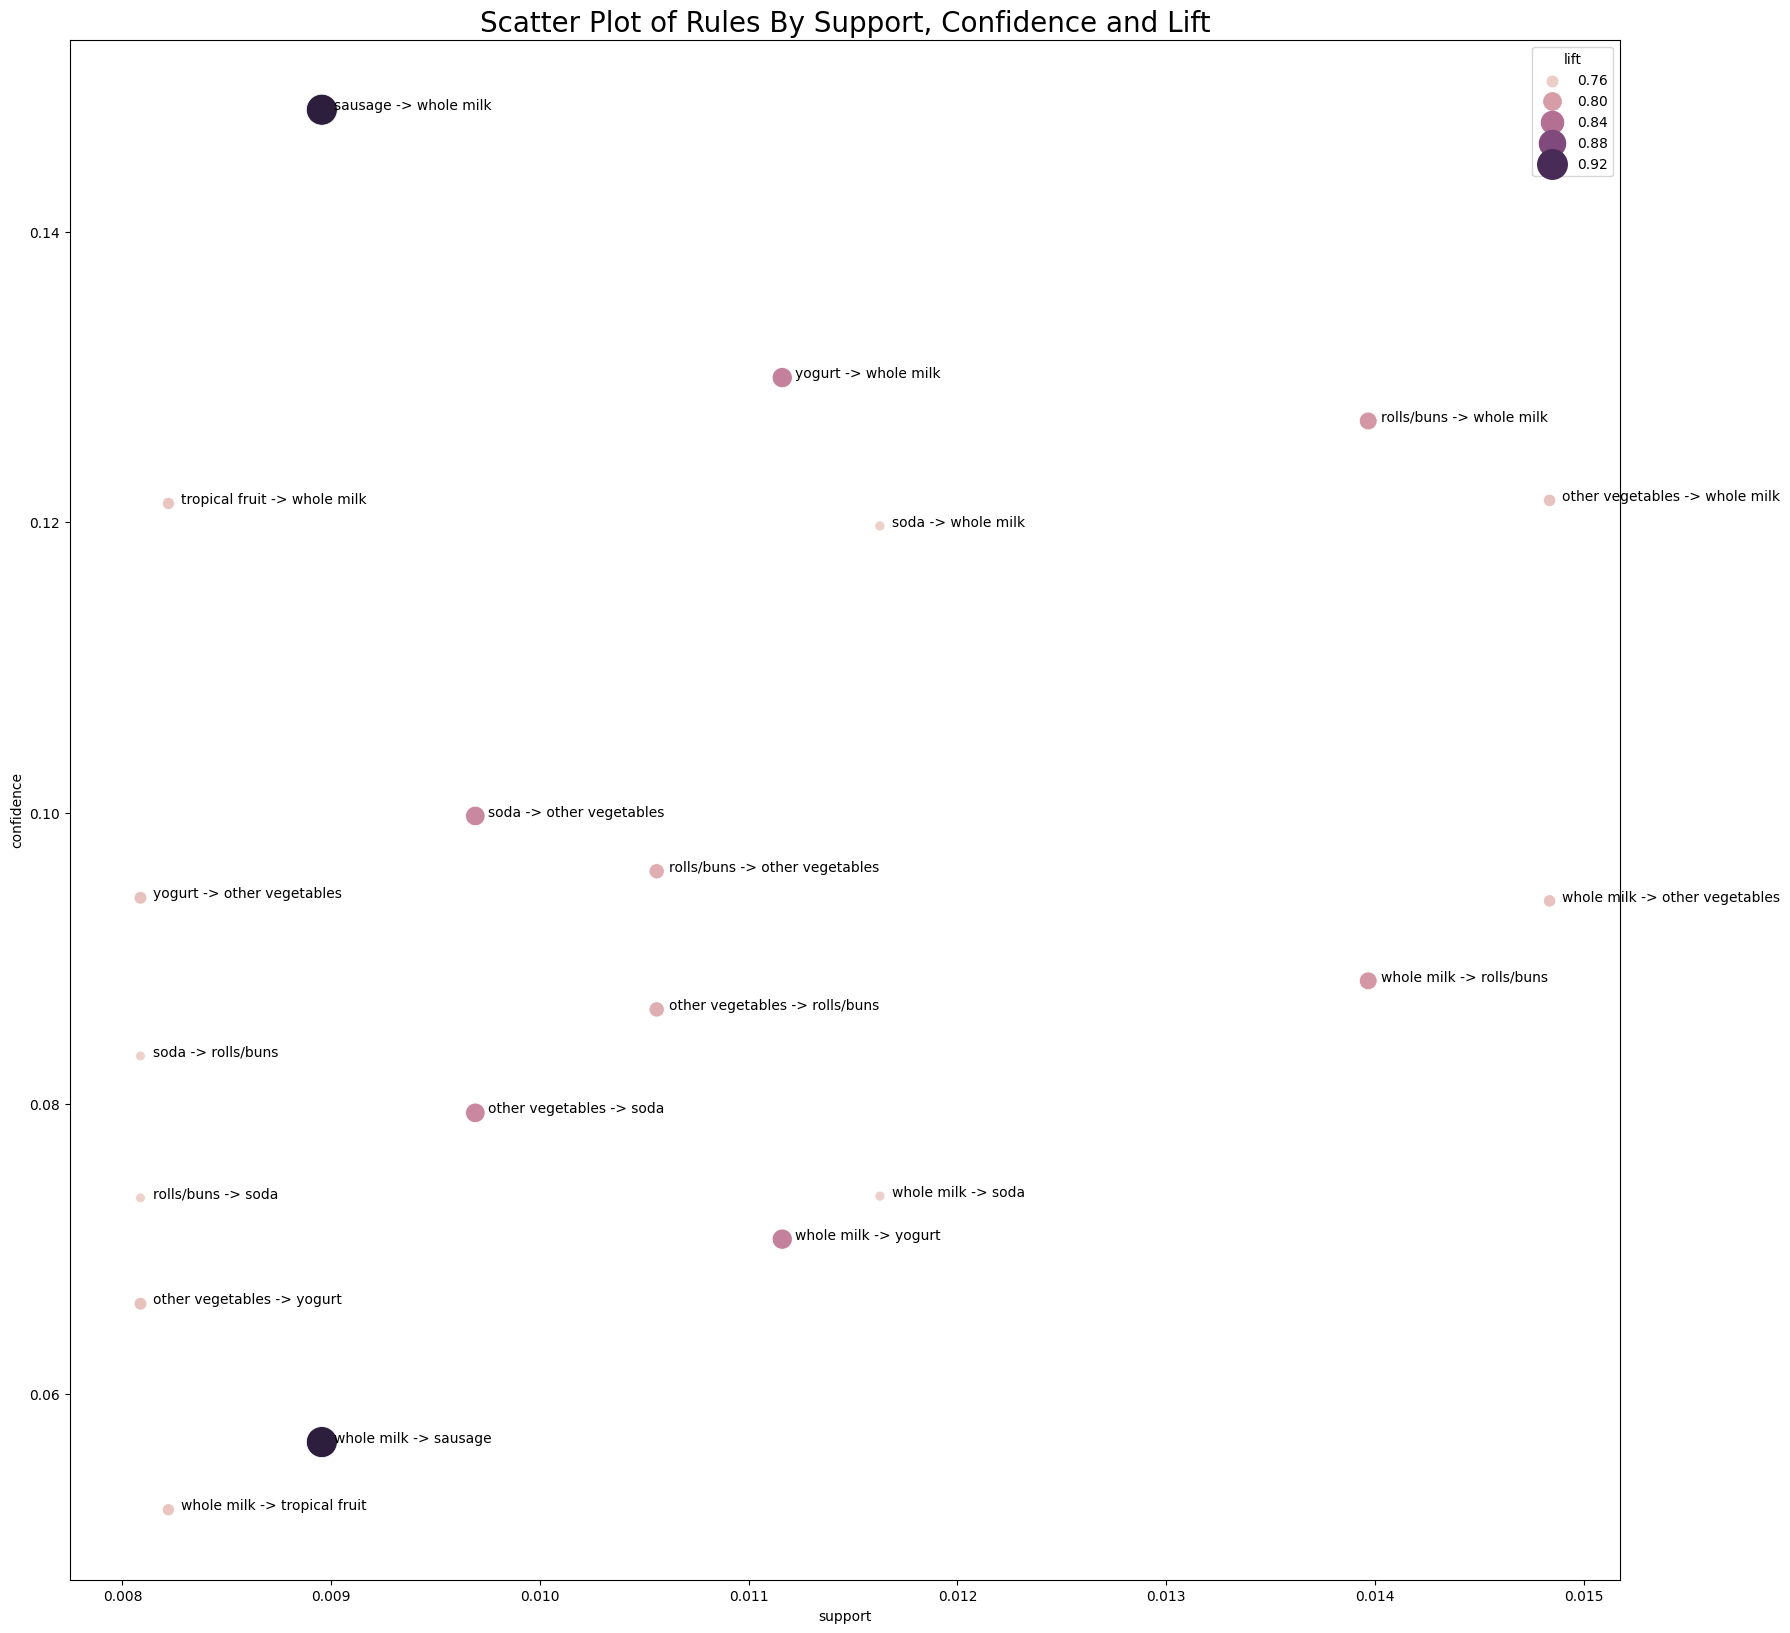

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (20,20))
support = fp_rules['support']
confidence = fp_rules['confidence']
rule = fp_rules['Rule']
ax = sns.scatterplot(data = fp_rules, x = 'support', y = 'confidence', hue = 'lift', size = 'lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i]+0.00006, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)

Recommedation

In [ ]:
def Products_recommender(item):

    item_df = fp_transactions.loc[fp_transactions[item]==True]
    frequent_itemsets = fpgrowth(item_df, min_support=0.008, use_colnames = True)


    item_fp_rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold=0.05)
    item_fp_rules["antecedents"] = item_fp_rules["antecedents"].apply(lambda x: list(x)[0])
    item_fp_rules["consequents"] = item_fp_rules["consequents"].apply(lambda x: list(x)[0])
    item_fp_rules['Rule'] = item_fp_rules['antecedents'] + ' -> ' + item_fp_rules['consequents']


    item_fp_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

    print('َproducts frequently bought together with ' + item  )

    return item_fp_rules['consequents'].unique()[:5]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Products_recommender('sausage')

َproducts frequently bought together with sausage


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['whole milk', 'sausage', 'yogurt', 'soda', 'rolls/buns'],
      dtype=object)